# Iterated Exponential Moving Average on Inhomogeneous Time Series
This notebook calculates an Iterative Exponential Moving Average on a simulated Inhomogeneous Timer Series for three rates of decay ($\tau$) at once.

The `inhom_iema` routine is using a decay kernel of the following form:

$$
\frac{e^{-t_i/\tau}}{\tau}
$$

This gives rise to the following iterative formula of the Exponential Moving Average (EMA) operator:

$$
\text{EMA}[\tau;z](t_i)=\mu\text{EMA}[\tau;z](t_{i-1})+(\nu-\mu)z_{i-1}+(1-\nu)z_i
$$

where $t$ is the inhomogenous (although ordered) points in time, $z$ is the set of observations, and:

$$
\mu = e^{\alpha} \;\; \text{and} \;\; \alpha = \frac{t_i - t_{i-1}}{\tau}
$$

The value of $\nu$ depends on the method of interpolation chosen.

See the NAG Library for Python documentation for the further details on this function: [NAG Library for Python docs](https://www.nag.com/numeric/py/nagdoc_latest/naginterfaces.library.tsa.html#naginterfaces.library.tsa.inhom_iema)

## Import packages, set up data, and set parameters

Besides the plotting package below, we only need to import the Time Series Analysis submodule of the NAG Library

In [1]:
from naginterfaces.library import tsa

We have 30 simulated observations at 30 inhomogeneous points in time.

In [2]:
#Observations (floats)
obs = [
    0.6, 0.6, 0.8, 0.1, 0.2, 0.2, 0.5, 0.7, 0.1, 0.4, 0.7, 0.8,
    0.3, 0.2, 0.5, 0.2, 0.3, 0.8, 0.6, 0.1, 0.7, 0.9, 0.6, 0.3,
    0.1, 0.1, 0.4, 1.0, 1.0, 0.1,
]

#Points in time (floats)
t = [
    7.5, 8.2, 18.1, 22.8, 25.8, 26.8, 31.1, 38.4, 45.9, 48.2, 48.9,
    57.9, 58.5, 63.9, 65.2, 66.6, 67.4, 69.3, 69.9, 73.0, 75.6,
    77.0, 84.7, 86.8, 88.0, 88.5, 91.0, 93.0, 93.7, 94.0,
]

We will now set the initial parameters, which consist of:

* `tau` - the decay parameter. this script will calculate the IEMA for 3 $\tau$ values at once
* `sinit` -  the first two elements represent an initial point in time and a corresponding observation, while the additional elements after represent initial values for the EMA for the total number of iterations you require (e.g. if sinit has 3 elements, there will only be one iteration)
* `inter` - select the interpolation method for the first and subsequent iterations, respectively; see docs for more info
    
  1) Previous point:  $\nu = 1$
    
  2) Linear:  $\nu = (1-\mu) / \alpha$
    
  3) Next point:  $\nu = \mu$

In [3]:
tau = [0.5, 2., 8.] #must be floats
sinit = [5., 0.5, 0.5, 0.5] #must be floats
inter = [3, 2] # you can only choose 1, 2, or 3 for each of the two elements

## Call `inhom_iema`, plot, and print results

In [4]:
iema_0 = tsa.inhom_iema(obs, t, tau[0], inter, sinit=sinit).iema
iema_1 = tsa.inhom_iema(obs, t, tau[1], inter, sinit=sinit).iema
iema_2 = tsa.inhom_iema(obs, t, tau[2], inter, sinit=sinit).iema

<IPython.core.display.Javascript object>


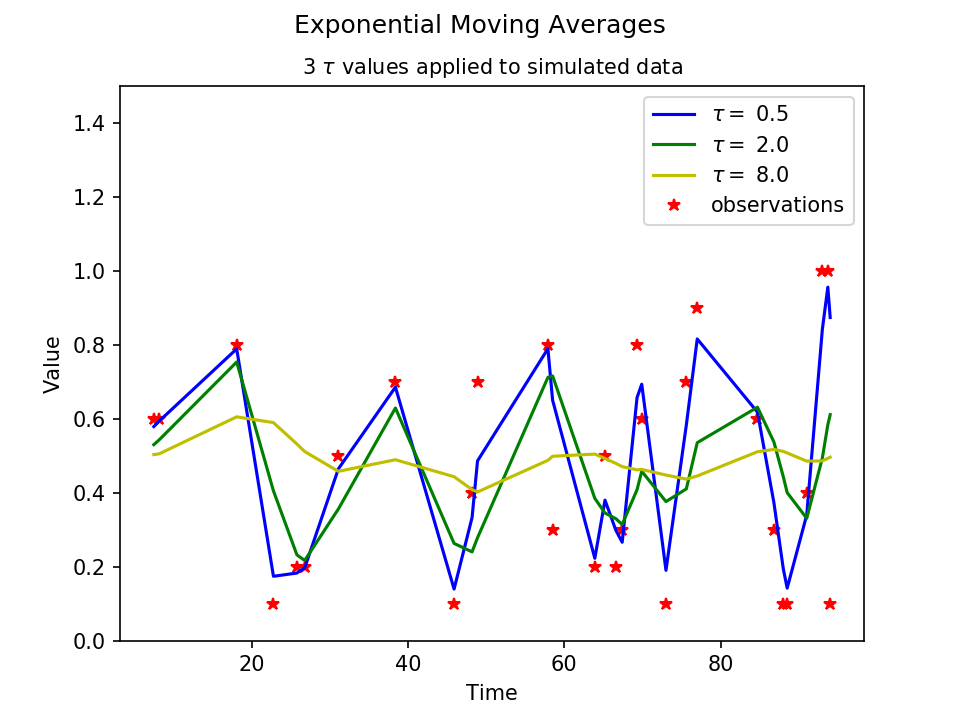

Text(0.5, 1.0, '3 $\\tau$ values applied to simulated data')

In [5]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
v0, = plt.plot(t, obs, 'r*', label='observations')
e0, = plt.plot(t, iema_0, 'b-', label=r'$\tau =$ {:2.2}'.format(tau[0]))
e1, = plt.plot(t, iema_1, 'g-', label=r'$\tau =$ {:2.2}'.format(tau[1]))
e2, = plt.plot(t, iema_2, 'y-', label=r'$\tau =$ {:2.2}'.format(tau[2]))
plt.ylim(0,1.5)
plt.legend(handles=[e0, e1, e2, v0], loc='upper right')
plt.xlabel('Time')
plt.ylabel('Value')
plt.suptitle(
    'Exponential Moving Averages'
)
plt.title(r'3 $\tau$' + ' values applied to simulated data', fontsize = 10)

In [6]:
header_str = "| Time | EMA for | EMA for | EMA for |"
second_str = "\n| pts. | tau={:2.2} | tau={:2.2} | tau={:2.2} |"
print(header_str + second_str.format(tau[0], tau[1], tau[2]))
print('-'*(len(header_str)))
for i, t_i in enumerate(t):
    print('{:6.3f}   {:6.3f}    {:6.3f}    {:6.3f}'.format(t_i, iema_0[i], iema_1[i], iema_2[i]))

| Time | EMA for | EMA for | EMA for |
| pts. | tau=0.5 | tau=2.0 | tau=8.0 |
--------------------------------------
 7.500    0.580     0.531     0.504
 8.200    0.595     0.544     0.506
18.100    0.790     0.754     0.606
22.800    0.175     0.406     0.590
25.800    0.183     0.232     0.532
26.800    0.198     0.217     0.512
31.100    0.465     0.357     0.459
38.400    0.686     0.630     0.490
45.900    0.140     0.263     0.444
48.200    0.333     0.241     0.409
48.900    0.487     0.279     0.403
57.900    0.790     0.713     0.488
58.500    0.651     0.717     0.499
63.900    0.223     0.385     0.505
65.200    0.381     0.346     0.493
66.600    0.298     0.330     0.480
67.400    0.267     0.315     0.471
69.300    0.658     0.409     0.463
69.900    0.694     0.459     0.464
73.000    0.191     0.377     0.448
75.600    0.583     0.411     0.437
77.000    0.817     0.536     0.446
84.700    0.619     0.632     0.511
86.800    0.374     0.538     0.518
88.000    0.195    